#### Author: Roberto Mendoza Matos
#### Code's funtions: 
1. Convert coordinates to decimal format
2. District's shapefile (Lima metropolitana and Callao)
3. Function puts UBIGEO and District name 
4. Maps for Metro, Metropolitano & alimentadores 

#### Date: 04/03/2022
#### Last updated : 09/03/2022
#### Check:

In [1]:
# import package pandas, geopandas, plots

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet


# maps packages
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString, Polygon

# import regular expression 

import re


In [2]:

base = pd.read_excel(r'..\Transporte\Transporte\metro_stations.xlsx', sheet_name = "Sheet1")
type(base)
base.info()
base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cod_district    56 non-null     float64
 1   district        56 non-null     object 
 2   transport_type  312 non-null    object 
 3   station_name    312 non-null    object 
 4   sur             152 non-null    object 
 5   oeste           152 non-null    object 
 6   rute            312 non-null    object 
 7   status          312 non-null    object 
 8   station_lat     198 non-null    float64
 9   station_long    198 non-null    float64
dtypes: float64(3), object(7)
memory usage: 24.5+ KB


,cod_district,district,transport_type,station_name,sur,oeste,rute,status,station_lat,station_long
0,150112.0,independencia,metropolitano,E. NARANJAL,"11°58'51.19""S","77° 3'31.63""O",both,done,-11.980175,-77.059137
1,150112.0,independencia,metropolitano,IZAGUIRRE,"11°59'22.96""S","77° 3'25.30""O",both,done,-11.989565,-77.057029
2,150112.0,independencia,metropolitano,PACIFICO E1,"11°59'41.19""S","77° 3'21.84""O",both,done,-11.994892,-77.055967
3,150112.0,independencia,metropolitano,INDEPENDENCIA E1,"11°59'55.00""S","77° 3'18.79""O",both,done,-11.998516,-77.055247
4,150112.0,independencia,metropolitano,JAZMINES E1,"12° 0'7.88""S","77° 3'17.16""O",both,done,-12.001924,-77.054783
...,...,...,...,...,...,...,...,...,...,...
307,NaN,NaN,alimentador_12,Alcides Vigo,NaN,NaN,both,done,-12.160260,-76.989131
308,NaN,NaN,alimentador_12,Las crucetas,NaN,NaN,both,done,-12.155906,-76.990279
309,NaN,NaN,alimentador_12,D. Tristan y Moscoso,NaN,NaN,return,done,-12.152950,-76.989859
310,NaN,NaN,alimentador_12,Paseo de la República,NaN,NaN,both,done,-12.151625,-76.988855


In [3]:
# two database: base0 has not (grades, minutes and seconds) coordinates, base1 has (grades, minutes and seconds) coordinates


base0 = base[base.sur.isna()]

# drop "nan" on sur coordinates 

base1 = base.dropna(subset = ['sur'])
base1 = base1.drop(['station_lat', 'station_long'], axis = 1)

                

In [4]:
# Function to convert a decimals coordinates 

def decimal(cc):
    grados, minutos, segundos, direccion = re.split('[°\'"]+', cc)
    d = float(grados) + float(minutos)/60 + float(segundos)/3600
    return d*-1 
                                                    


In [5]:
# Create decimalas coordinates in new variables

base1['station_lat'] = base1['sur'].apply(decimal)
base1['station_long'] = base1['oeste'].apply(decimal)

base1

,cod_district,district,transport_type,station_name,sur,oeste,rute,status,station_lat,station_long
0,150112.0,independencia,metropolitano,E. NARANJAL,"11°58'51.19""S","77° 3'31.63""O",both,done,-11.980886,-77.058786
1,150112.0,independencia,metropolitano,IZAGUIRRE,"11°59'22.96""S","77° 3'25.30""O",both,done,-11.989711,-77.057028
2,150112.0,independencia,metropolitano,PACIFICO E1,"11°59'41.19""S","77° 3'21.84""O",both,done,-11.994775,-77.056067
3,150112.0,independencia,metropolitano,INDEPENDENCIA E1,"11°59'55.00""S","77° 3'18.79""O",both,done,-11.998611,-77.055219
4,150112.0,independencia,metropolitano,JAZMINES E1,"12° 0'7.88""S","77° 3'17.16""O",both,done,-12.002189,-77.054767
...,...,...,...,...,...,...,...,...,...,...
191,NaN,NaN,metro_2,Evitamiento,"12°03'32""S","76°58'28""O",both,process,-12.058889,-76.974444
195,NaN,NaN,metro_2,28 de Julio,"12°03'39""S","77°00'47""O",both,process,-12.060833,-77.013056
207,NaN,NaN,metro_2,Insurgentes,"12°03'17""S","77°06'18""O",both,process,-12.054722,-77.105000
208,NaN,NaN,metro_2,Juan Pablo II,"12°03'25""S","77°06'55""O",both,process,-12.056944,-77.115278


In [6]:
# join base0 and base 1

base_final = base0.append(base1)
base_final

# lat and long coordinates to point geopandas 

#base_final['point'] = gpd.points_from_xy(base_final.station_long, base_final.station_lat, crs="EPSG:4326")

base_final = gpd.GeoDataFrame(base_final, geometry=gpd.points_from_xy(base_final.station_long,base_final.station_lat))

base_final = base_final.reset_index()

#base_final.info()
base_final.loc[55]

index                                       204
cod_district                                NaN
district                                    NaN
transport_type                          metro_2
station_name                         San Marcos
sur                                         NaN
oeste                                       NaN
rute                                       both
status                                  process
station_lat                          -12.055867
station_long                         -77.081041
geometry          POINT (-77.081041 -12.055867)
Name: 55, dtype: object

In [7]:
#load distric shapefile (Fuente: INEI)

maps = gpd.read_file(r'..\Transporte\Transporte\shapefile\DISTRITOS.shp')

# keep Lima metropolitana & Callao

maps = maps[ (maps.IDDPTO == "07") | (maps.IDPROV == "1501")]
maps = maps[['IDDIST', 'DISTRITO' , 'geometry']]
maps = maps.reset_index()

#from object (string) to int format

maps['IDDIST'] = maps['IDDIST'].astype(str).astype(int)

# rename IDDIST for UBIGEO
maps = maps.rename({'IDDIST':'UBIGEO'}, axis =1 )
maps.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   index     50 non-null     int64   
 1   UBIGEO    50 non-null     int32   
 2   DISTRITO  50 non-null     object  
 3   geometry  50 non-null     geometry
dtypes: geometry(1), int32(1), int64(1), object(1)
memory usage: 1.5+ KB


In [8]:
a = maps['UBIGEO'][42]
a

150135

In [9]:
#Function generates ubigeo by each coordinate

def ubigeo(c, mapa):
    
    pip = 0
    i = 0
    while(pip == 0):
        
        pip = int(c.within(mapa.loc[i, 'geometry']))
        i = i+1
        ubi = int(mapa['UBIGEO'][i-1]) 
        
        if i == 50:
            ubi = " "
            break 
        
    return ubi

In [10]:
# example
a = ubigeo(base_final.loc[59, 'geometry'], maps)
a

70101

In [11]:
base_final

,index,cod_district,district,transport_type,station_name,sur,oeste,rute,status,station_lat,station_long,geometry
0,38,150106.0,Carabayllo,metropolitano,Chimpu Ocllo,NaN,NaN,extension,process,-11.894786,-77.036604,POINT (-77.03660 -11.89479)
1,39,150110.0,Comas,metropolitano,San Felipe,NaN,NaN,extension,process,-11.900887,-77.039894,POINT (-77.03989 -11.90089)
2,40,150110.0,Comas,metropolitano,San Carlos,NaN,NaN,extension,process,-11.906092,-77.042775,POINT (-77.04278 -11.90609)
3,41,150110.0,Comas,metropolitano,La Alborada,NaN,NaN,extension,process,-11.910913,-77.045499,POINT (-77.04550 -11.91091)
4,42,150110.0,Comas,metropolitano,Los Incas,NaN,NaN,extension,process,-11.914770,-77.047680,POINT (-77.04768 -11.91477)
...,...,...,...,...,...,...,...,...,...,...,...,...
307,191,NaN,NaN,metro_2,Evitamiento,"12°03'32""S","76°58'28""O",both,process,-12.058889,-76.974444,POINT (-76.97444 -12.05889)
308,195,NaN,NaN,metro_2,28 de Julio,"12°03'39""S","77°00'47""O",both,process,-12.060833,-77.013056,POINT (-77.01306 -12.06083)
309,207,NaN,NaN,metro_2,Insurgentes,"12°03'17""S","77°06'18""O",both,process,-12.054722,-77.105000,POINT (-77.10500 -12.05472)
310,208,NaN,NaN,metro_2,Juan Pablo II,"12°03'25""S","77°06'55""O",both,process,-12.056944,-77.115278,POINT (-77.11528 -12.05694)


In [12]:
# empty variable to fill with UBIGEO 

base_final['UBIGEO'] = np.nan
base_final['UBIGEO']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
307   NaN
308   NaN
309   NaN
310   NaN
311   NaN
Name: UBIGEO, Length: 312, dtype: float64

In [13]:
# Apply function to all coordinates 

i = 0

for row in base_final.iterrows():
    base_final['UBIGEO'][i] = ubigeo(base_final.loc[i, 'geometry'], maps)
    i = i + 1
    

C:\Users\Roberto Carlos\anaconda3\envs\geopandas_env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# Merge to get distric name 

base_final = pd.merge(base_final, maps, how="left", on=["UBIGEO"])

# select variables

base_final = base_final[['UBIGEO',
                        'DISTRITO', 'station_long', 'station_lat', 
                         'transport_type', 'station_name','rute','status','geometry_x','geometry_y']]

base_final_csv = base_final.drop(['geometry_y'], axis =1)


In [15]:
#Save csv format 
# CSV file without district shapefile 

base_final_csv.to_csv('..\Transporte\Transporte\metro_stations_updated.csv')

## 3.0 Maps

In [312]:
base_final.rename(columns = {'geometry_x' : 'point', 'geometry_y' : 'geometry'}, inplace = True)
base_mapa = gpd.GeoDataFrame(base_final, geometry='geometry')
base_mapa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   UBIGEO          312 non-null    float64 
 1   DISTRITO        312 non-null    object  
 2   station_long    312 non-null    float64 
 3   station_lat     312 non-null    float64 
 4   transport_type  312 non-null    object  
 5   station_name    312 non-null    object  
 6   rute            312 non-null    object  
 7   status          312 non-null    object  
 8   point           312 non-null    geometry
 9   geometry        312 non-null    geometry
dtypes: float64(3), geometry(2), object(5)
memory usage: 26.8+ KB


In [313]:
base_mapa

,UBIGEO,DISTRITO,station_long,station_lat,transport_type,station_name,rute,status,point,geometry
0,150106.0,CARABAYLLO,-77.036604,-11.894786,metropolitano,Chimpu Ocllo,extension,process,POINT (-77.03660 -11.89479),"POLYGON ((-76.89995 -11.72979, -76.89921 -11.7..."
1,150110.0,COMAS,-77.039894,-11.900887,metropolitano,San Felipe,extension,process,POINT (-77.03989 -11.90089),"POLYGON ((-77.04639 -11.89743, -77.04551 -11.8..."
2,150110.0,COMAS,-77.042775,-11.906092,metropolitano,San Carlos,extension,process,POINT (-77.04278 -11.90609),"POLYGON ((-77.04639 -11.89743, -77.04551 -11.8..."
3,150110.0,COMAS,-77.045499,-11.910913,metropolitano,La Alborada,extension,process,POINT (-77.04550 -11.91091),"POLYGON ((-77.04639 -11.89743, -77.04551 -11.8..."
4,150110.0,COMAS,-77.047680,-11.914770,metropolitano,Los Incas,extension,process,POINT (-77.04768 -11.91477),"POLYGON ((-77.04639 -11.89743, -77.04551 -11.8..."
...,...,...,...,...,...,...,...,...,...,...
307,150111.0,EL AGUSTINO,-76.974444,-12.058889,metro_2,Evitamiento,both,process,POINT (-76.97444 -12.05889),"POLYGON ((-76.94408 -12.02075, -76.94348 -12.0..."
308,150101.0,LIMA,-77.013056,-12.060833,metro_2,28 de Julio,both,process,POINT (-77.01306 -12.06083),"POLYGON ((-77.00474 -12.04166, -77.00296 -12.0..."
309,70101.0,CALLAO,-77.105000,-12.054722,metro_2,Insurgentes,both,process,POINT (-77.10500 -12.05472),"POLYGON ((-77.11219 -11.97352, -77.11203 -11.9..."
310,70101.0,CALLAO,-77.115278,-12.056944,metro_2,Juan Pablo II,both,process,POINT (-77.11528 -12.05694),"POLYGON ((-77.11219 -11.97352, -77.11203 -11.9..."


In [314]:
# Splitting data according kind of transport 

# Red metro Lima 

linea = ['metro_1', 'metro_2', 'metro_3', 'metro_4']
j = 0
for i in linea:
    j = j + 1
    globals()[f'T{j}'] = base_mapa[['transport_type','point']]   # select transport ype and point geometry
    globals()[f'T{j}'] = gpd.GeoDataFrame(globals()[f'T{j}'], geometry='point') # from pandas to Geo-pandas
    globals()[f'T{j}'] = globals()[f'T{j}'][globals()[f'T{j}'].transport_type == i] # filter by transport type

# Metropolitano 

M1 = base_mapa[['transport_type','status','point']]
M1 = gpd.GeoDataFrame(M1 , geometry='point')
M1 = M1[(M1.transport_type == "metropolitano") &  (M1.status == "done")]

# Metropolitano extension

M2 = base_mapa[['transport_type','status','point']]
M2 = gpd.GeoDataFrame(M2 , geometry='point')
M2 = M2[(M2.transport_type == "metropolitano") &  (M2.status == "process")]

# Alimentadores 


for j in range(1,13):
    globals()[f'A{j}'] = base_mapa[['transport_type','point']]
    globals()[f'A{j}'] = gpd.GeoDataFrame(globals()[f'A{j}'], geometry='point')
    globals()[f'A{j}'] = globals()[f'A{j}'][globals()[f'A{j}'].transport_type == f'alimentador_{j}']
    


In [315]:
# examples A12 : alimentador n° 12

A12

,transport_type,point
148,alimentador_12,POINT (-77.00315 -12.18413)
149,alimentador_12,POINT (-76.99985 -12.18298)
150,alimentador_12,POINT (-76.99669 -12.17879)
151,alimentador_12,POINT (-76.99264 -12.17395)
152,alimentador_12,POINT (-76.99208 -12.17046)
153,alimentador_12,POINT (-76.99045 -12.16682)
154,alimentador_12,POINT (-76.99073 -12.16378)
155,alimentador_12,POINT (-76.98913 -12.16026)
156,alimentador_12,POINT (-76.99028 -12.15591)
157,alimentador_12,POINT (-76.98986 -12.15295)


### Maps that includes all districts 

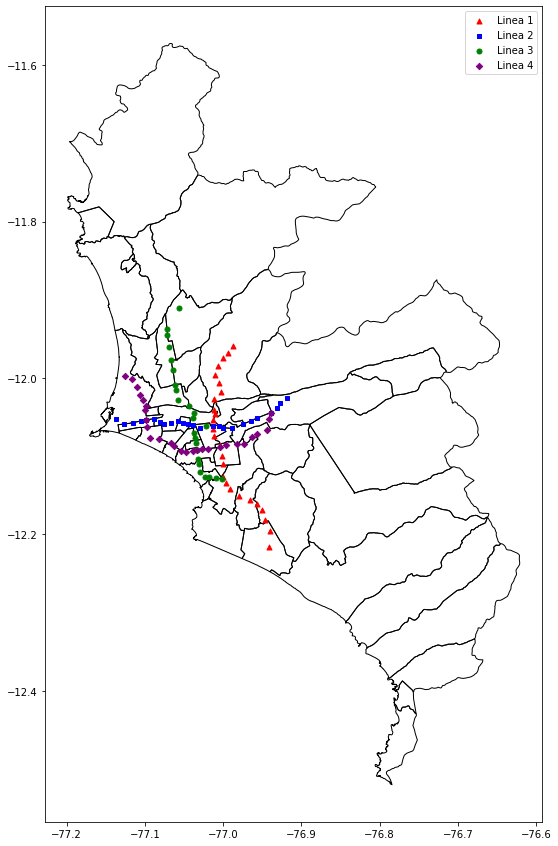

In [316]:
# Network metro - lima (lines 1 - 4)

fig, ax = plt.subplots(figsize=(10, 15))

maps.plot( color='none', edgecolor='black', zorder=1, ax=ax)
T1.plot(color='red', label = "Linea 1", markersize=25, marker = "^", ax=ax)
T2.plot(color='blue', label = "Linea 2", markersize=20, marker = "s", ax=ax)
T3.plot(color='green', label = "Linea 3", markersize=25, marker = "o", ax=ax)
T4.plot(color='purple', label = "Linea 4", markersize=20, marker = "D", ax=ax)

plt.legend(loc='upper right')
#ax.set_axis_off()

fig.savefig("metro_Lima_completa.png")

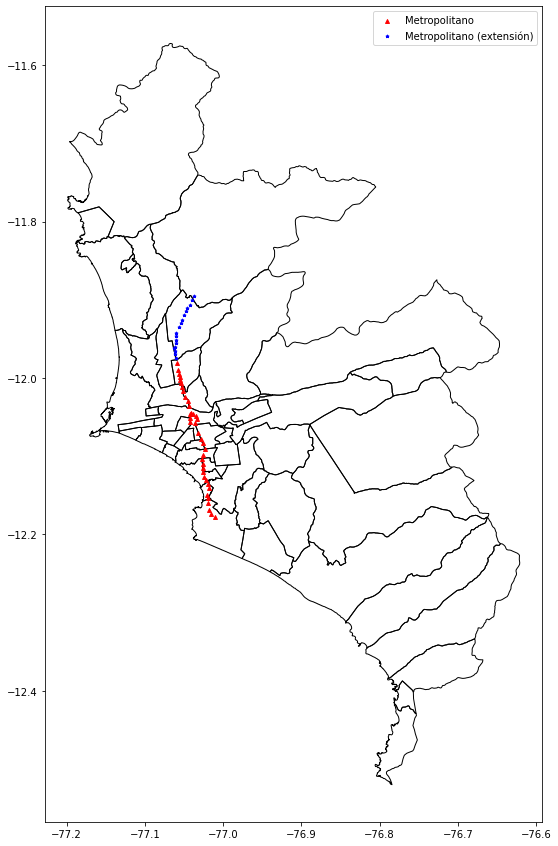

In [317]:
# Red del metropolitano de Lima 

fig, ax = plt.subplots(figsize=(10, 15))

maps.plot( color='none', edgecolor='black', zorder=1, ax=ax)
M1.plot(color='red', label = "Metropolitano", markersize=15, marker = "^", ax=ax)
M2.plot(color='blue', label = "Metropolitano (extensión)", markersize=9, marker = "*", ax=ax)

plt.legend(loc='upper right')

fig.savefig("metropolitano_Lima_completa.png")

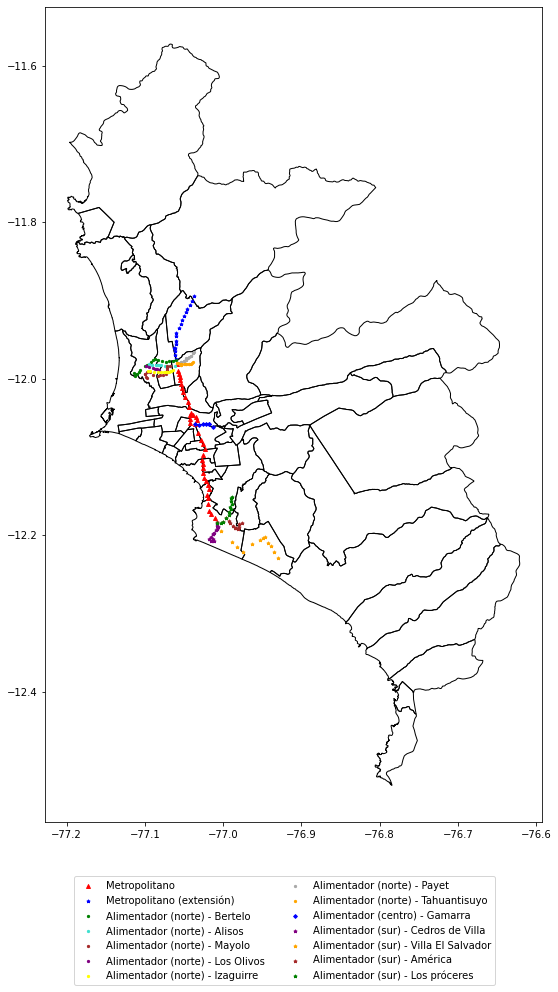

In [318]:
# Red del metropolitano de Lima & alimentadores 

fig, ax = plt.subplots(figsize=(10, 15))

maps.plot( color='none', edgecolor='black', zorder=1, ax=ax)
M1.plot(color='red', label = "Metropolitano", markersize=15, marker = "^", ax=ax)
M2.plot(color='blue', label = "Metropolitano (extensión)", markersize=10, marker = "*", ax=ax)

#add alimentadores 
A1.plot(color='green', label = "Alimentador (norte) - Bertelo", markersize=5, marker = "o", ax=ax)
A2.plot(color='turquoise', label = "Alimentador (norte) - Alisos", markersize=5, marker = "o", ax=ax)
A3.plot(color='brown', label = "Alimentador (norte) - Mayolo", markersize=5, marker = "o", ax=ax)
A4.plot(color='purple', label = "Alimentador (norte) - Los Olivos", markersize=5, marker = "o", ax=ax)
A5.plot(color='yellow', label = "Alimentador (norte) - Izaguirre", markersize=5, marker = "o", ax=ax)
A6.plot(color='darkgray', label = "Alimentador (norte) - Payet", markersize=5, marker = "o", ax=ax)
A7.plot(color='orange', label = "Alimentador (norte) - Tahuantisuyo", markersize=5, marker = "o", ax=ax)
A8.plot(color='blue', label = "Alimentador (centro) - Gamarra", markersize=7, marker = "D", ax=ax)
A9.plot(color='purple', label = "Alimentador (sur) - Cedros de Villa", markersize=10, marker = "*", ax=ax)
A10.plot(color='orange', label = "Alimentador (sur) - Villa El Salvador", markersize=10, marker = "*", ax=ax)
A11.plot(color='brown', label = "Alimentador (sur) - América", markersize=10, marker = "*", ax=ax)
A12.plot(color='green', label = "Alimentador (sur) - Los próceres", markersize=10, marker = "*", ax=ax)

# better legend position
ax.figure.legend(loc='lower center', bbox_to_anchor=(0.5, -0.03), ncol=2);

fig.savefig("metropolitano_alimentador_Lima_completa.png")

### Maps that exclude some districts (Ancon, Santa Rosa, Punta hermosa, Punta negra, San bartolo, Santa maría del mar y Pucusana)

In [319]:
maps = maps[(maps.UBIGEO != 150102) & (maps.UBIGEO != 150124) & (maps.UBIGEO != 150126) & (maps.UBIGEO != 150127) & (maps.UBIGEO != 150129) & (maps.UBIGEO != 150138) & (maps.UBIGEO != 150139)]

maps

,index,UBIGEO,DISTRITO,geometry
0,378,150119,LURIN,"POLYGON ((-76.70549 -12.17672, -76.70429 -12.1..."
2,544,150131,SAN ISIDRO,"POLYGON ((-77.04859 -12.08504, -77.04762 -12.0..."
3,545,150120,MAGDALENA DEL MAR,"POLYGON ((-77.07210 -12.08358, -77.06348 -12.0..."
4,547,150130,SAN BORJA,"POLYGON ((-76.98732 -12.07994, -76.98425 -12.0..."
5,548,150116,LINCE,"POLYGON ((-77.02807 -12.07871, -77.02435 -12.0..."
6,549,150140,SANTIAGO DE SURCO,"POLYGON ((-76.95923 -12.07576, -76.95831 -12.0..."
7,552,150121,PUEBLO LIBRE,"POLYGON ((-77.04966 -12.07025, -77.05097 -12.0..."
8,553,70105,LA PUNTA,"POLYGON ((-77.15884 -12.06645, -77.15874 -12.0..."
10,699,150106,CARABAYLLO,"POLYGON ((-76.89995 -11.72979, -76.89921 -11.7..."
11,1004,150113,JESUS MARIA,"POLYGON ((-77.03811 -12.06768, -77.03629 -12.0..."


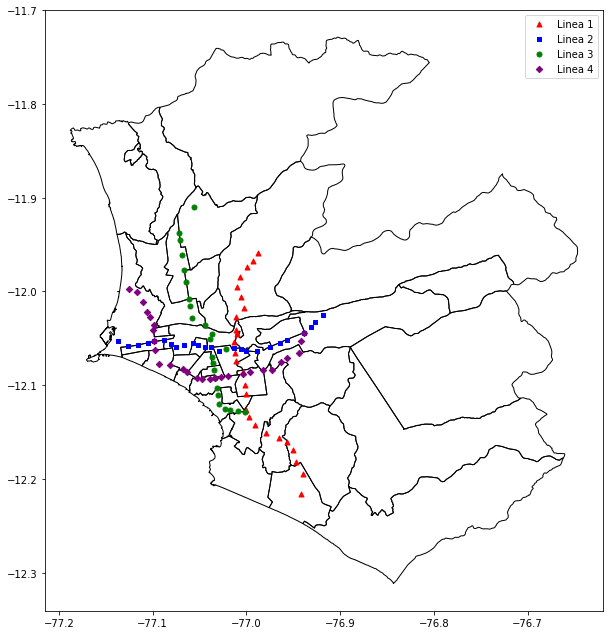

In [320]:
# Network metro - lima (lines 1 - 4)

fig, ax = plt.subplots(figsize=(10, 15))

maps.plot( color='none', edgecolor='black', zorder=1, ax=ax)
T1.plot(color='red', label = "Linea 1", markersize=25, marker = "^", ax=ax)
T2.plot(color='blue', label = "Linea 2", markersize=20, marker = "s", ax=ax)
T3.plot(color='green', label = "Linea 3", markersize=25, marker = "o", ax=ax)
T4.plot(color='purple', label = "Linea 4", markersize=20, marker = "D", ax=ax)

plt.legend(loc='upper right')
fig.savefig("metro_Lima_incompleta.png")

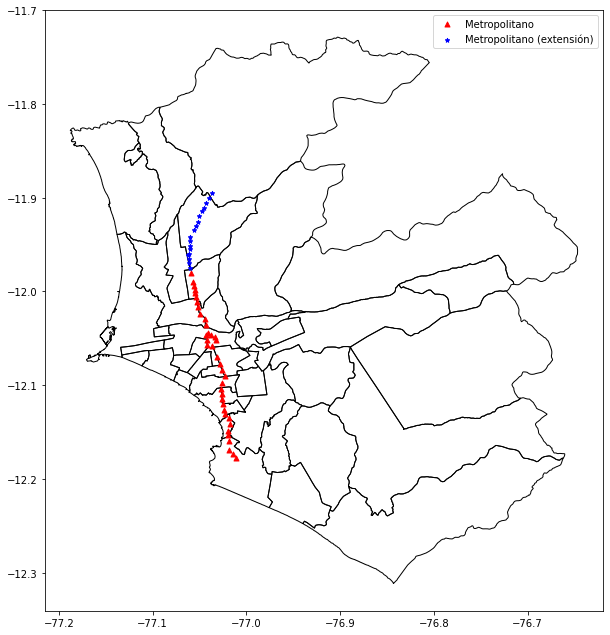

In [321]:
# Red del metropolitano de Lima 

fig, ax = plt.subplots(figsize=(10, 15))

maps.plot( color='none', edgecolor='black', zorder=1, ax=ax)
M1.plot(color='red', label = "Metropolitano", markersize=25, marker = "^", ax=ax)
M2.plot(color='blue', label = "Metropolitano (extensión)", markersize=18, marker = "*", ax=ax)

plt.legend(loc='upper right')

fig.savefig("metropolitano_Lima_incompleta.png")

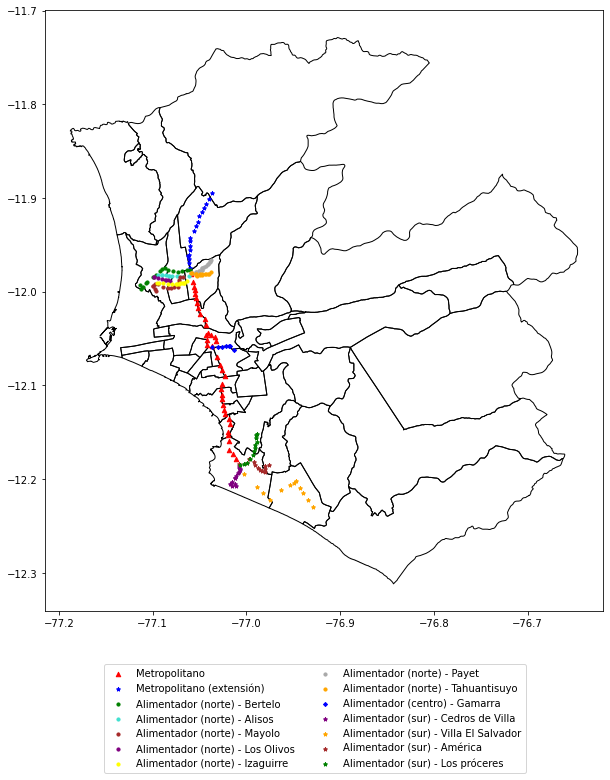

In [322]:
# Red del metropolitano de Lima & alimentadores 

fig, ax = plt.subplots(figsize=(10, 15))

maps.plot( color='none', edgecolor='black', zorder=1, ax=ax)
M1.plot(color='red', label = "Metropolitano", markersize=20, marker = "^", ax=ax)
M2.plot(color='blue', label = "Metropolitano (extensión)", markersize=15, marker = "*", ax=ax)

#add alimentadores 
A1.plot(color='green', label = "Alimentador (norte) - Bertelo", markersize=10, marker = "o", ax=ax)
A2.plot(color='turquoise', label = "Alimentador (norte) - Alisos", markersize=10, marker = "o", ax=ax)
A3.plot(color='brown', label = "Alimentador (norte) - Mayolo", markersize=10, marker = "o", ax=ax)
A4.plot(color='purple', label = "Alimentador (norte) - Los Olivos", markersize=10, marker = "o", ax=ax)
A5.plot(color='yellow', label = "Alimentador (norte) - Izaguirre", markersize=10, marker = "o", ax=ax)
A6.plot(color='darkgray', label = "Alimentador (norte) - Payet", markersize=10, marker = "o", ax=ax)
A7.plot(color='orange', label = "Alimentador (norte) - Tahuantisuyo", markersize=10, marker = "o", ax=ax)
A8.plot(color='blue', label = "Alimentador (centro) - Gamarra", markersize=8, marker = "D", ax=ax)
A9.plot(color='purple', label = "Alimentador (sur) - Cedros de Villa", markersize=15, marker = "*", ax=ax)
A10.plot(color='orange', label = "Alimentador (sur) - Villa El Salvador", markersize=15, marker = "*", ax=ax)
A11.plot(color='brown', label = "Alimentador (sur) - América", markersize=15, marker = "*", ax=ax)
A12.plot(color='green', label = "Alimentador (sur) - Los próceres", markersize=15, marker = "*", ax=ax)

# better legend position
ax.figure.legend(loc='lower center', bbox_to_anchor=(0.5, 0.07), ncol=2);

fig.savefig("metropolitano_alimentador_Lima_in
            completa.png")